## What is vector database

A vector database is a specialized type of database designed to store, index, and search high-dimensional vector representations of data, such as embeddings generated by machine learning models. 

These databases enable efficient similarity search and retrieval of items (like documents, images, or audio) based on the closeness of their vector representations, which is essential for applications like semantic search, recommendation systems, and generative AI workflows.


## Architecture of vector databases

Vector databases typically consist of several key components:
 
 1. **Storage Layer**: Efficiently stores raw high-dimensional vectors and associated metadata.
 2. **Indexing Engine**: Builds and maintains indexes (such as HNSW, IVF, or PQ) to enable fast similarity search.
 3. **Query Processor**: Handles incoming search queries, computes vector similarities (e.g., cosine similarity, Euclidean distance), and retrieves the most relevant results.
 4. **API/Interface Layer**: Provides user-facing endpoints for inserting, updating, deleting, and searching vectors.
 
 This architecture allows vector databases to scale to billions of vectors and support low-latency, high-throughput search operations, making them essential for modern AI applications.


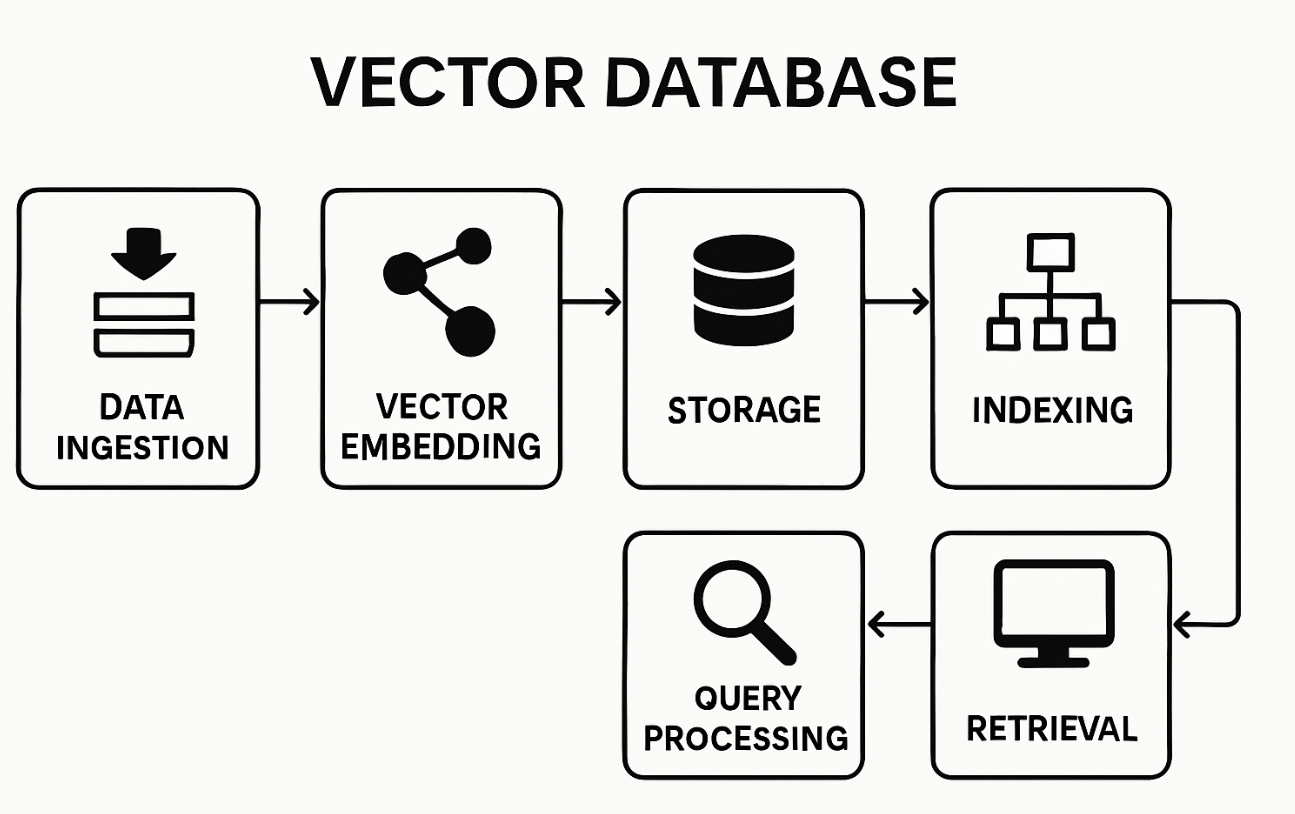

#### Key Components Involved
To understand how the correct index is retrieved, it’s important to consider the following components:

**Vectors:** High-dimensional numerical arrays representing data points (e.g., embeddings of text, images).

**Index Structure:** A data structure (e.g., graph, tree, or hash-based) that organizes vectors for efficient search.

**Distance Metric:** A function to measure similarity between vectors (e.g., cosine similarity, Euclidean distance, dot product).

**Query Vector:** The input vector for which similar vectors are sought.

**Approximate Nearest Neighbor (ANN) Search:** An algorithm that finds close (but not necessarily exact) matches to the query vector with reduced computational cost.

## How vector database works?

#### Step 1 Data Emebedding

create vector embedding using a aiml or llm model

#### Step 2 Storage

store raw vectors along with it's meta data in vector storage

#### Step 3 Create Indexing for effiecient search(to reduce search space)

Use algorithms like ANN(Approximate Nearest Neighbor) to create indexing.

#### Step 4 Query Processing

The query vector is compared to **indexed vectors** using a distance metric. Distance metric can be cosine similarity(for text), Euclidean distance(image or spatial data), dot product(when vectors are normalized)

top k results are retrived for answering with llm

## Indexing Algorithms

### Approximate Nearest Neighbor
ANN (Approximate Nearest Neighbor) algorithms are used to quickly find vectors in a database that are closest to a given query vector.
These algorithms trade off a small amount of accuracy for significant improvements in search speed, making them ideal for large-scale vector databases.

variants of ANN

1. Flat Indexing (Exhaustive Search)
This baseline approach performs brute-force computation by comparing the query vector against every stored vector without any preprocessing. It guarantees exact nearest neighbors but scales poorly with dataset size due to linear time complexity (O(n)). Flat indexing is suitable for small datasets where precision is paramount and resources are not constrained.
2. Inverted File (IVF) Indexing
IVF partitions the vector space into clusters using quantization techniques, such as k-means clustering, to create an inverted index of cluster centroids. During queries, only vectors in the nearest clusters are scanned, reducing search space. This method offers a good balance of speed and recall, particularly when combined with other techniques like product quantization for compression. It is widely used in databases like FAISS for its simplicity and effectiveness on large-scale data.
3. Hierarchical Navigable Small World (HNSW) Indexing
HNSW constructs a multi-layered graph structure inspired by skip lists and navigable small-world networks, where each layer represents a coarser approximation of the data. Queries traverse from higher to lower layers to efficiently approximate nearest neighbors with high recall. This graph-based algorithm excels in high-dimensional spaces, providing logarithmic query times and high accuracy, making it a default choice in production systems like Weaviate and Pinecone.
4. Locality-Sensitive Hashing (LSH)
LSH employs hash functions that preserve locality, mapping similar vectors to the same buckets with high probability. It supports fast, probabilistic ANN searches by probing relevant buckets. While memory-efficient and quick to build, LSH may suffer from lower recall in very high dimensions unless tuned with multiple hash tables. It is often applied in streaming or real-time scenarios.
5. Product Quantization (PQ)
PQ compresses vectors by dividing them into sub-vectors and quantizing each into a codebook, enabling compact storage and approximate distance computations via lookup tables. It is frequently paired with IVF (as IVF-PQ) to enhance scalability. This technique trades minor accuracy loss for significant reductions in memory and query latency, proving valuable for billion-scale datasets.
6. KD-Trees (K-Dimensional Trees)
KD-trees recursively partition the vector space using hyperplanes aligned with coordinate axes, forming a balanced tree for range and nearest neighbor queries. They perform well in low-to-medium dimensions but degrade in high dimensions due to the curse of dimensionality, where the tree becomes unbalanced. Tree-based variants remain useful for hybrid indexing in certain vector database configurations.



### Exact Nearest Neighbor

ENN avoid approaximation(trading off accuracy for speed) issue.

1. Exact Nearest Neighbor (ENN) or Exact k-Nearest Neighbors (kNN) Search

Exact kNN computes distances between the query vector and every stored vector in the dataset, guaranteeing the true nearest neighbors without approximation. This brute-force or exhaustive approach achieves 100% recall but incurs linear time complexity (O(n)), making it computationally intensive for large-scale datasets. 

It is ideal for small-to-medium datasets (e.g., under 10,000 vectors) where precision outweighs latency concerns, such as in medical diagnostics or financial modeling. In contrast to ANN, exact kNN prioritizes accuracy over scalability, often serving as a baseline for evaluating ANN performance.

2. Lexical or Keyword-Based Search

For applications requiring strict term matching rather than semantic similarity, lexical search—using inverted indexes or full-text search engines—serves as a non-vector alternative. This method excels in precision for exact phrase queries but lacks the contextual understanding of vector embeddings. It is particularly useful in hybrid systems combining keyword and vector search, enhancing recall for structured text data while avoiding ANN's probabilistic nature.

3. Hybrid Search Approaches

Hybrid methods integrate exact or lexical components with vector search, fusing results via scoring (e.g., reciprocal rank fusion). For instance, combining kNN with keyword filters ensures both semantic relevance and exact matches. This is common in production vector databases like Weaviate or Elasticsearch, providing a balanced alternative for real-world applications such as e-commerce recommendations.


## Pros and Cons of Vector Databases

 **Pros:**
 - Efficient similarity search for high-dimensional data (e.g., text, images, audio).
 - Scalable to billions of vectors using approximate nearest neighbor (ANN) algorithms.
 - Supports flexible metadata filtering and hybrid search (combining vector and keyword search).
 - Enables real-time retrieval for applications like semantic search, recommendation, and RAG (Retrieval-Augmented Generation).

 **Cons:**
 - May require specialized infrastructure and tuning for optimal performance.
 - Approximate search can lead to minor accuracy trade-offs.
 - Data updates (inserts, deletes) can be more complex than in traditional databases.
 - Limited support for complex relational queries compared to traditional RDBMS.
 - Integration with existing data pipelines and security models may require extra effort.
